# Sentiment Analysis using Python

###### One of the applications of text mining is sentiment analysis. Most of the data is getting generated in textual format and in the past few years. Improvement is a continuous process and many product based companies leverage these text mining techniques to examine the sentiments of the customers to find about what they can improve in the product. This information also helps them to understand the trend and demand of the end user which results in Customer satisfaction.

###### As text mining is a vast concept, the article is divided into two subchapters. The main focus of this article will be calculating two scores: sentiment polarity and subjectivity using python. The range of polarity is from -1 to 1(negative to positive) and will tell us if the text contains positive or negative feedback. Most companies prefer to stop their analysis here but in our second article, we will try to extend our analysis by creating some labels out of these scores.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

import textblob as TextBlob
import wordcloud as WordCloud

In [2]:
df=pd.read_json('C:\\Users\\91897\\Downloads\\Customer_Reviews.txt',lines=True)
df.to_csv('C:\\Users\\91897\\Downloads\\Customer_Reviews.csv',index=None)

In [3]:
df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/theworkingboat/status/1460...,2021-11-16 09:54:20+00:00,⭐ THANK YOU ⭐\n\nOur popular #Sunday night pub...,⭐ THANK YOU ⭐\n\nOur popular #Sunday night pub...,1460546769096425476,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[Sunday, TheWorkingBoat, Falmouth]",None
1,snscrape.modules.twitter.Tweet,https://twitter.com/WeHoLove/status/1460523193...,2021-11-16 08:20:39+00:00,Ahhh big stars in #gayweho #redressparty #mick...,Ahhh big stars in #gayweho #redressparty #mick...,1460523193395933188,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,3,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,None,None,None,"[gayweho, redressparty, mickysweho, Sunday, th...",None
2,snscrape.modules.twitter.Tweet,https://twitter.com/bdsrated/status/1460518587...,2021-11-16 08:02:21+00:00,Without God\nour week would be\nSINDAY\nMOURND...,Without God\nour week would be\nSINDAY\nMOURND...,1460518587639025673,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[CHURCH, SUNDAY, BDMS, SOMEWHEREINCAVITE, BILL]",None
3,snscrape.modules.twitter.Tweet,https://twitter.com/maggietranquila/status/146...,2021-11-16 07:34:44+00:00,#awesome #Attitude #Motivation #commitment #Su...,#awesome #Attitude #Motivation #commitment #Su...,1460511638856114185,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,None,None,None,"[awesome, Attitude, Motivation, commitment, Su...",None
4,snscrape.modules.twitter.Tweet,https://twitter.com/BadalonaCC/status/14605071...,2021-11-16 07:16:46+00:00,@BadalonaCC #Sunday training with @omaree02\n\...,@BadalonaCC #Sunday training with @omaree02\n\...,1460507115982925826,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,4,...,"[{'_type': 'snscrape.modules.twitter.Video', '...",NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,[Sunday],None


# Data Preprocessing

In [4]:
df.isnull().sum()

_type                  0
url                    0
date                   0
content                0
renderedContent        0
id                     0
user                   0
replyCount             0
retweetCount           0
likeCount              0
quoteCount             0
conversationId         0
lang                   0
source                 0
sourceUrl              0
sourceLabel            0
outlinks            3588
tcooutlinks         3588
media               2224
retweetedTweet      5642
quotedTweet         5424
inReplyToTweetId    5373
inReplyToUser       5373
mentionedUsers      4630
coordinates         5020
place               5020
hashtags               0
cashtags            5627
dtype: int64

##### As our focus is only on column name df['content'] so we will fill all nulls values with ' ' this.

In [5]:
df.fillna('',inplace=True)

In [6]:
df.shape

(5642, 28)

In [7]:
import nltk

from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()

from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

### Making Texts in lower case

In [8]:
df['content']=df['content'].str.lower()

In [9]:
df['content'][0]

'⭐ thank you ⭐\n\nour popular #sunday night pub quizzes have been a huge success for 2021. \n\nthanks to you, we have raised £904 for @hospaction  and £200 for falmouth primary academy as part of their great norse row.\n\nbring on the next quiz! \n\n#theworkingboat #falmouth https://t.co/7djvtspufj'

### Removing URLs

In [10]:
def remove_urls(text):
    para=re.compile(r'https?://\S+|www\.\S')
    return para.sub(r'',text)

df['content']=df['content'].apply(remove_urls)                 

In [11]:
df['content'][0]

'⭐ thank you ⭐\n\nour popular #sunday night pub quizzes have been a huge success for 2021. \n\nthanks to you, we have raised £904 for @hospaction  and £200 for falmouth primary academy as part of their great norse row.\n\nbring on the next quiz! \n\n#theworkingboat #falmouth '

### Removing Stopwords

In [12]:
sw=set(stopwords.words('english'))

def removingstopwords(text):
    return " ".join([word for word in str(text).split() if word not in sw])

df['content']=df['content'].apply(removingstopwords)

In [13]:
df['content'][0]

'⭐ thank ⭐ popular #sunday night pub quizzes huge success 2021. thanks you, raised £904 @hospaction £200 falmouth primary academy part great norse row. bring next quiz! #theworkingboat #falmouth'

### Removing Punctuations

In [15]:
import string

punc=string.punctuation
print('These are punctuations in punc:',punc)

def removingpunctuations(text):
    translator = str.maketrans('', '', punc)
    return text.translate(translator)

df['content']=df['content'].apply(lambda text:removingpunctuations(text))

These are punctuations in punc: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [16]:
df['content'][0]

'⭐ thank ⭐ popular sunday night pub quizzes huge success 2021 thanks you raised £904 hospaction £200 falmouth primary academy part great norse row bring next quiz theworkingboat falmouth'

### Removing Repeated Characters



In [17]:
def repeatedwords(text):
    return re.sub(r'(.)1+',r'1',text)

df['content']=df['content'].apply(lambda text:repeatedwords(text))                  

In [18]:
df['content'][0]

'⭐ thank ⭐ popular sunday night pub quizzes huge success 201 thanks you raised £904 hospaction £200 falmouth primary academy part great norse row bring next quiz theworkingboat falmouth'

### Removing Numbers

In [19]:
def removenum(text):
    return re.sub('[0-9]+','',text)

df['content']=df['content'].apply(removenum)                 

In [20]:
df['content'][0]

'⭐ thank ⭐ popular sunday night pub quizzes huge success  thanks you raised £ hospaction £ falmouth primary academy part great norse row bring next quiz theworkingboat falmouth'

### Removing Short words and signs

In [21]:
def remove(text):
    return " ".join([word for word in str(text).split() if len(word)>=3])

df['content']=df['content'].apply(remove)                 

In [22]:
df['content'][0]

'thank popular sunday night pub quizzes huge success thanks you raised hospaction falmouth primary academy part great norse row bring next quiz theworkingboat falmouth'

# Tokenization

In [23]:
# It directly converts into tokens
from nltk.tokenize import TweetTokenizer

tt=TweetTokenizer()
df['content']=df['content'].apply(tt.tokenize)


In [24]:
df['content'][0]

['thank',
 'popular',
 'sunday',
 'night',
 'pub',
 'quizzes',
 'huge',
 'success',
 'thanks',
 'you',
 'raised',
 'hospaction',
 'falmouth',
 'primary',
 'academy',
 'part',
 'great',
 'norse',
 'row',
 'bring',
 'next',
 'quiz',
 'theworkingboat',
 'falmouth']

# Stemming

In [25]:
import nltk
st=nltk.PorterStemmer()

def stemming(x):
    text=[st.stem(word) for word in x]
    return x

df['content']=df['content'].apply(stemming)

In [27]:
df['content'].head()

['thank',
 'popular',
 'sunday',
 'night',
 'pub',
 'quizzes',
 'huge',
 'success',
 'thanks',
 'you',
 'raised',
 'hospaction',
 'falmouth',
 'primary',
 'academy',
 'part',
 'great',
 'norse',
 'row',
 'bring',
 'next',
 'quiz',
 'theworkingboat',
 'falmouth']

# Lemmatizing

In [28]:
import nltk
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [29]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['content'] = df['content'].apply(lambda x: lemmatizer_on_text(x))
df['content'].head()

0    [thank, popular, sunday, night, pub, quizzes, ...
1    [ahhh, big, stars, gayweho, redressparty, mick...
2    [without, god, week, would, sinday, mournday, ...
3    [awesome, attitude, motivation, commitment, su...
4    [badalonacc, sunday, training, omaree, cricket...
Name: content, dtype: object

# New column named Subjectivity

In [30]:
from textblob import TextBlob

def for_subjectivity(text):
    text=" ".join(text)
    return TextBlob(text).sentiment.subjectivity

In [31]:
df['subjectivity'] = df['content'].apply(for_subjectivity)

# New column named Polarity

In [32]:
def for_polarity(text):
    text=" ".join(text)
    return TextBlob(text).sentiment.polarity

In [33]:
df['polarity'] = df['content'].apply(for_polarity)

In [34]:
df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,subjectivity,polarity
0,snscrape.modules.twitter.Tweet,https://twitter.com/theworkingboat/status/1460...,2021-11-16 09:54:20+00:00,"[thank, popular, sunday, night, pub, quizzes, ...",⭐ THANK YOU ⭐\n\nOur popular #Sunday night pub...,1460546769096425476,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,,,,"[{'_type': 'snscrape.modules.twitter.User', 'u...",,,"[Sunday, TheWorkingBoat, Falmouth]",,0.464286,0.385714
1,snscrape.modules.twitter.Tweet,https://twitter.com/WeHoLove/status/1460523193...,2021-11-16 08:20:39+00:00,"[ahhh, big, stars, gayweho, redressparty, mick...",Ahhh big stars in #gayweho #redressparty #mick...,1460523193395933188,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,3,...,,,,,,,"[gayweho, redressparty, mickysweho, Sunday, th...",,0.100000,0.000000
2,snscrape.modules.twitter.Tweet,https://twitter.com/bdsrated/status/1460518587...,2021-11-16 08:02:21+00:00,"[without, god, week, would, sinday, mournday, ...",Without God\nour week would be\nSINDAY\nMOURND...,1460518587639025673,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,,,,"[{'_type': 'snscrape.modules.twitter.User', 'u...",,,"[CHURCH, SUNDAY, BDMS, SOMEWHEREINCAVITE, BILL]",,0.625000,-0.375000
3,snscrape.modules.twitter.Tweet,https://twitter.com/maggietranquila/status/146...,2021-11-16 07:34:44+00:00,"[awesome, attitude, motivation, commitment, su...",#awesome #Attitude #Motivation #commitment #Su...,1460511638856114185,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,,,,,,,"[awesome, Attitude, Motivation, commitment, Su...",,1.000000,1.000000
4,snscrape.modules.twitter.Tweet,https://twitter.com/BadalonaCC/status/14605071...,2021-11-16 07:16:46+00:00,"[badalonacc, sunday, training, omaree, cricket...",@BadalonaCC #Sunday training with @omaree02\n\...,1460507115982925826,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,4,...,,,,"[{'_type': 'snscrape.modules.twitter.User', 'u...",,,[Sunday],,0.000000,0.000000


##  Adding a categorical column on the basis of Polarity

#### 3 Categories are as follows:
###### 1. Positive
###### 2. Neutral
###### 3. Negative

In [35]:
def score(x):
    if x>0:
        return 'Positive'
    elif x==0:
        return 'Neutral'
    else:
        return 'Negative'
    
df['Sentiment']=df['polarity'].apply(score)

In [36]:
df.sample(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,subjectivity,polarity,Sentiment
3152,snscrape.modules.twitter.Tweet,https://twitter.com/newsoneplace/status/145983...,2021-11-14 10:34:26+00:00,"[metroremembrance, sunday, time, twominute, si...",(Metro):#Remembrance #Sunday: What time is the...,1459832087293444100,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,,,,,,"[Remembrance, Sunday, TrendsSpy]",,0.000000,0.000000,Neutral
4691,snscrape.modules.twitter.Tweet,https://twitter.com/dcMilionis/status/14594159...,2021-11-13 07:00:54+00:00,"[love, art, flyinghearts, collectorshelpingcol...",We ALL #love the #art of #flyinghearts for #Co...,1459415961963053057,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,,,,,,"[love, art, flyinghearts, CollectorsHelpingCol...",,0.233333,0.166667,Positive
1045,snscrape.modules.twitter.Tweet,https://twitter.com/EndingViolence/status/1459...,2021-11-14 19:25:24+00:00,"[sunday, team, frontline, vancouver, farrah, g...",Our #Sunday team on the frontline in #Vancouve...,1459965710378037248,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,...,,,,,,"[Sunday, Vancouver, endvaw, endgbv, vaw, gbv]",,0.000000,0.000000,Neutral
2419,snscrape.modules.twitter.Tweet,https://twitter.com/WAVY10Bob/status/145988425...,2021-11-14 14:01:45+00:00,"[good, sunday, morning, friends]",Good #Sunday morning friends! 🌞,1459884258311475206,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,3,...,,,,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",[Sunday],,0.600000,0.700000,Positive
4068,snscrape.modules.twitter.Tweet,https://twitter.com/i_VivekOfficial/status/145...,2021-11-14 04:36:13+00:00,"[राम, हनुमानजी, की, ।, महाराज, की, ।, neemkaro...","जय राम जी की, जय हनुमानजी की। जय हो महाराज जी ...",1459741940304396293,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,,,,,,"[NeemKaroliBaba, goodmorning, sundayvibes, Sun...",,0.000000,0.000000,Neutral
3366,snscrape.modules.twitter.Tweet,https://twitter.com/ultimateeducate/status/145...,2021-11-14 09:35:07+00:00,"[sunday, life, lifestyleblogger, workout, work...",#sunday #life #lifestyleblogger #workout #work...,1459817158771458054,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,1,...,,,,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...","[sunday, life, lifestyleblogger, workout, work...",,0.125000,0.000000,Neutral
3635,snscrape.modules.twitter.Tweet,https://twitter.com/BeertjeBrult/status/145979...,2021-11-14 07:58:41+00:00,"[goodmorning, nice, amp, happy, monet, sunday,...",#Goodmorning 🙏\nHave A Nice &amp; #Happy #Mone...,1459792890327150593,"{'_type': 'snscrape.modules.twitter.User', 'us...",3,0,8,...,,,"[{'_type': 'snscrape.modules.twitter.User', 'u...",,,"[Goodmorning, Happy, Monet, sunday, Day]",,1.000000,0.666667,Positive
2812,snscrape.modules.twitter.Tweet,https://twitter.com/G0DL1K3D3V1L/status/145985...,2021-11-14 12:23:20+00:00,"[sunday, netflix, rednotice, accompanied, home...",#Sunday #Netflix is #RedNotice accompanied by ...,1459859492405977091,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,,,,,,"[Sunday, Netflix, RedNotice, samgyupsal]",,0.000000,0.000000,Neutral
1618,snscrape.modules.twitter.Tweet,https://twitter.com/ManoloBellon/status/145992...,2021-11-14 16:50:00+00:00,"[todayinhistory, sunday, staysafe, birthdate, ...",#TodayInHistory #Sunday #StaySafe -1939 -Birth...,1459926600007380993,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,4,...,,,"[{'_type': 'snscrape.modules.twitter.User', 'u...",,,"[TodayInHistory, Sunday, StaySafe, WendyCarlos]",,0.950000,0.750000,Positive
3565,snscrape.modules.twitter.Tweet,https://twitter.com/Heather70006527/status/145...,2021-11-14 08:22:56+00:00,"[surrounded, beautiful, colours, morning, guar...",Surrounded by beautiful col

C:\Users\91897\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


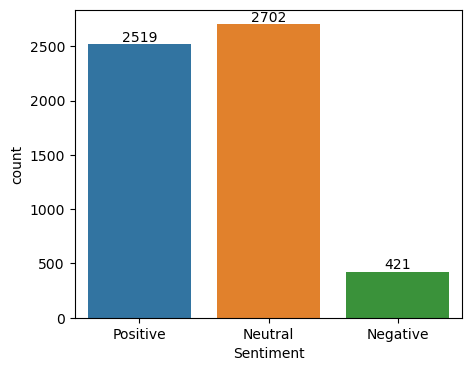

In [37]:
plt.figure(figsize=(5,4))
ax=sns.countplot(df['Sentiment'])
ax.bar_label(ax.containers[0])
plt.show()

### Graphs based on Sentiment using  ' WordCloud '

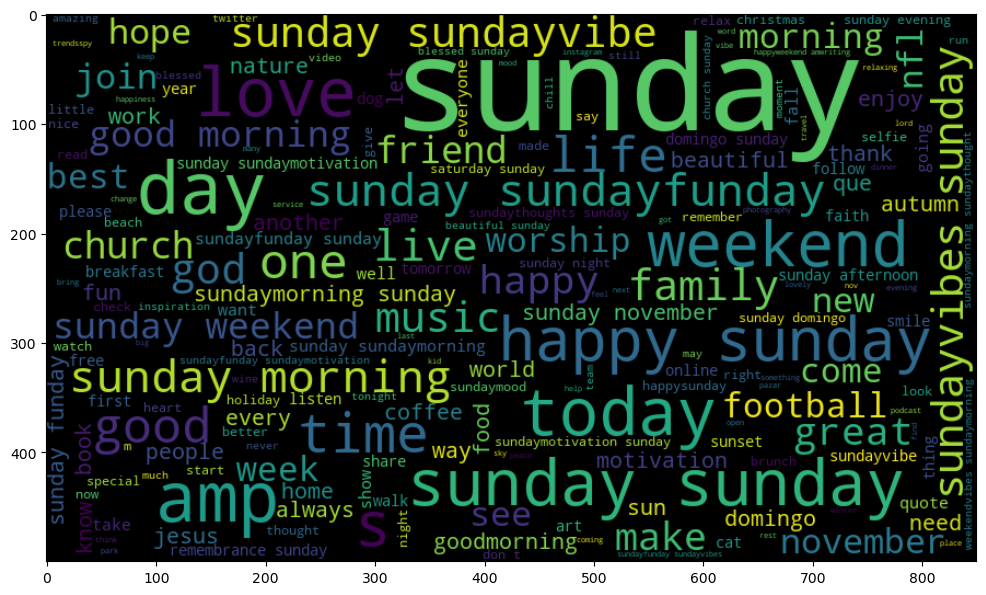

In [38]:
all_words=" ".join(" ".join(x) for x in df['content'])

from wordcloud import WordCloud

wordcloud=WordCloud(width=850, height=500 ,random_state=42, max_font_size=120,).generate(all_words)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### Most repetative words in 'Positive' Sentiment

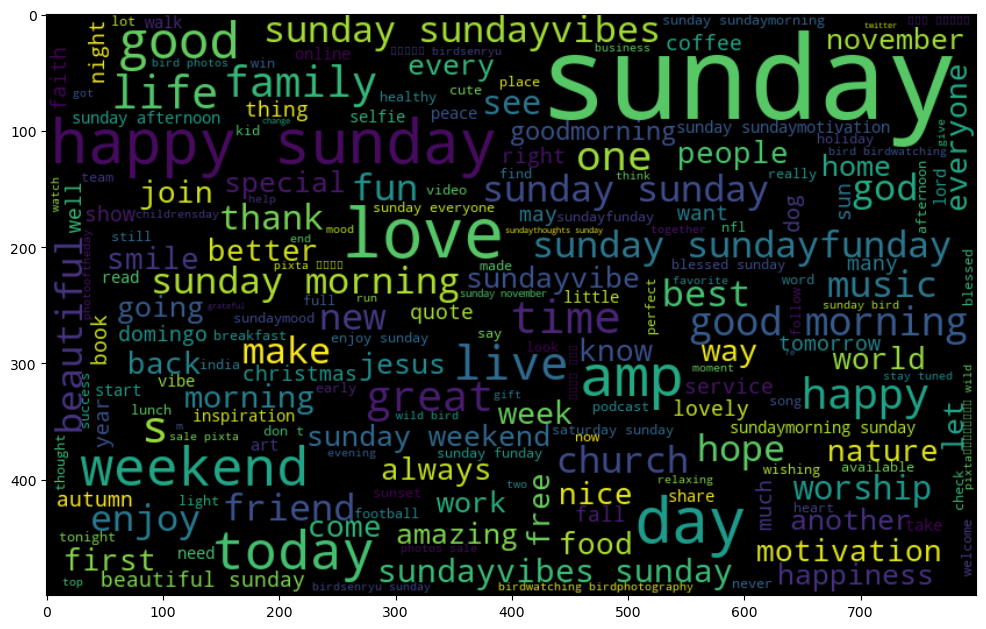

In [39]:
df_positive=df[df['Sentiment'] == 'Positive']

all_positive=" ".join(" ".join(x) for x in df_positive['content'])

image=WordCloud(height=500,width=800,random_state=42,max_font_size=100).generate(all_positive)

plt.figure(figsize=(12,10))
plt.imshow(image, interpolation='bilinear')
plt.show()

### Most repetative words in 'Negative' Sentiment

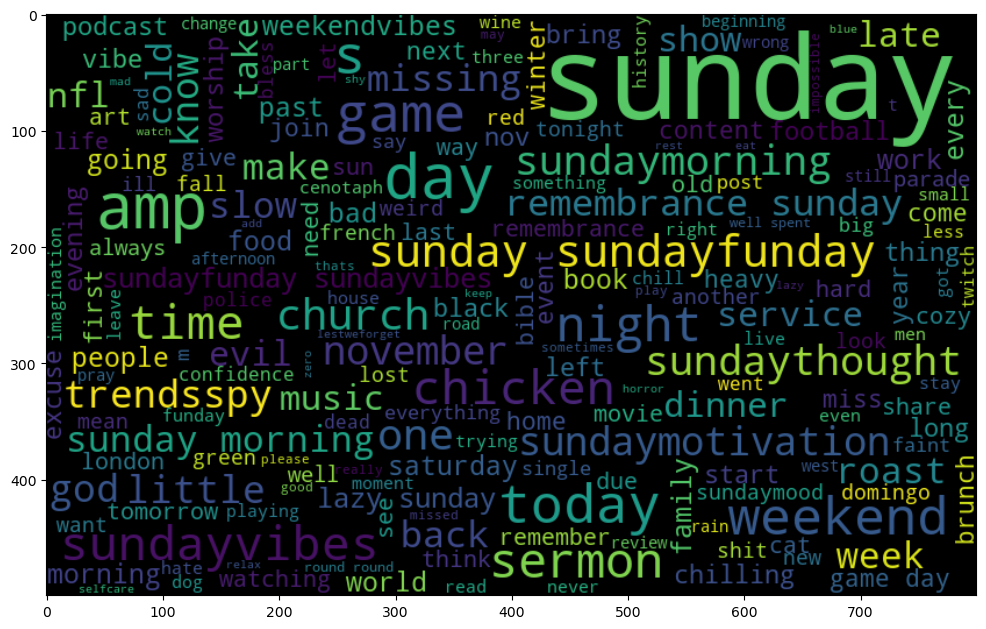

In [40]:
df_negative=df[df['Sentiment'] == 'Negative']

all_positive=" ".join(" ".join(x) for x in df_negative['content'])

image=WordCloud(height=500,width=800,random_state=42,max_font_size=100).generate(all_positive)

plt.figure(figsize=(12,10))
plt.imshow(image, interpolation='bilinear')
plt.show()

### Most repetative words in 'Neutral' Sentiment

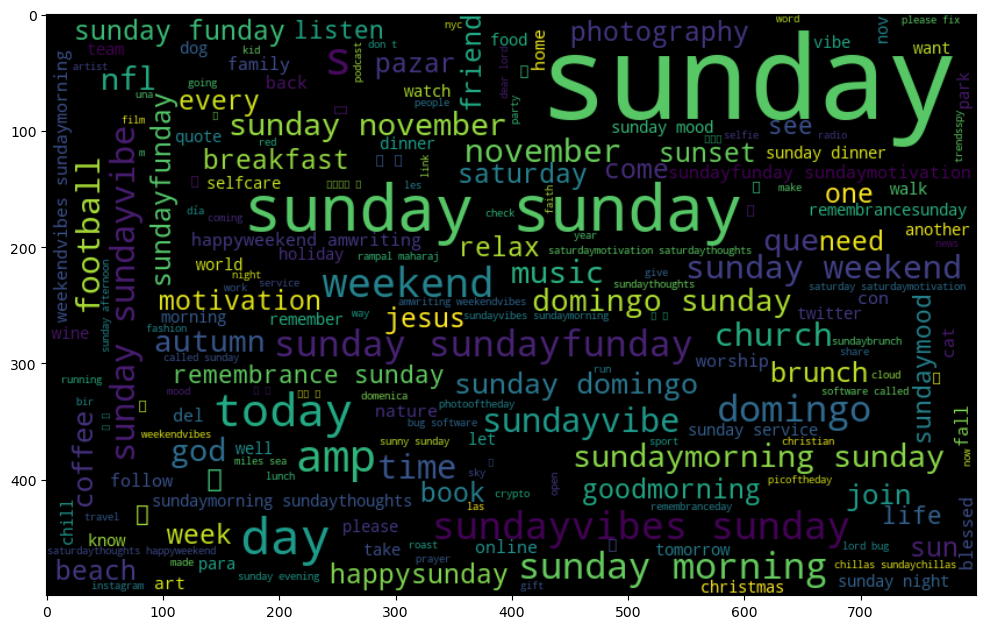

In [41]:
df_neutral=df[df['Sentiment'] == 'Neutral']

all_positive=" ".join(" ".join(x) for x in df_neutral['content'])

image=WordCloud(height=500,width=800,random_state=42,max_font_size=100).generate(all_positive)

plt.figure(figsize=(12,10))
plt.imshow(image, interpolation='bilinear')
plt.show()

<AxesSubplot:xlabel='polarity', ylabel='subjectivity'>

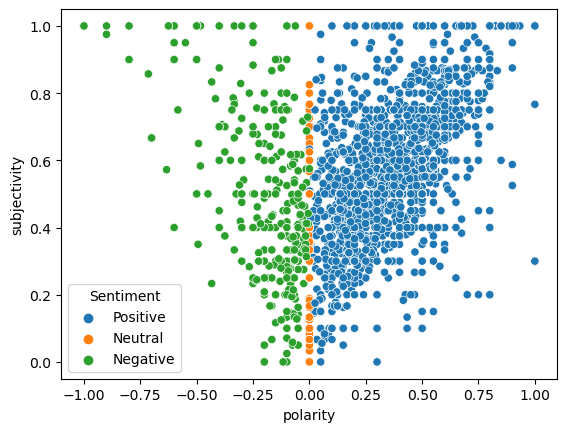

In [42]:
sns.scatterplot(x=df['polarity'],y=df['subjectivity'],hue=df['Sentiment'])


In [43]:
print(df['Sentiment'].value_counts(normalize=True)*100,'%')

Neutral     47.890819
Positive    44.647288
Negative     7.461893
Name: Sentiment, dtype: float64 %


# Conclusion:

#### Overall dataset consists mostly prior of Neutral Tweets(47.8%), followed by Positive Tweets(44.6%) then lastly few Negative Tweets(7.4%).

    Both Neutral and Positive tweets are similar in terms of percentage.
    